In [2]:
pip install numpy pandas scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
print(data.columns.tolist())


['Year', '% Renewable Energy', '% Energy from CHP', 'Scope 1 Emissions', 'Scope 2 Emissions', 'Scope 3 Emissions', 'Carbon Intensity (Revenue)', 'Carbon Intensity (Employee)', 'Energy Consumption (Revenue)', 'Energy Efficiency (% R&D)', '% Waste Recycled', 'Hazardous Waste (Unit)', 'Water Consumption (Unit)', 'ESG Score']


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'synthetic_esg_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Handle missing values by imputing with mean
data.fillna(data.mean(), inplace=True)

# Convert 'Scope 3 Emissions' to numeric if needed
data['Scope 3 Emissions'] = pd.to_numeric(
    data['Scope 3 Emissions'], errors='coerce'
)

# Normalize the data
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data.iloc[i:i + seq_length].values)
        y.append(data.iloc[i + seq_length].values)
    return np.array(x), np.array(y)

sequence_length = 3
X, y = create_sequences(normalized_data, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(y_train.shape[1])  # Output layer matches the number of features
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


C:\Users\Siddhi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.3311 - val_loss: 0.3677
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3215 - val_loss: 0.3583
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 0.3121 - val_loss: 0.3489
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 0.3029 - val_loss: 0.3394
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 0.2938 - val_loss: 0.3298
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.2848 - val_loss: 0.3202
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - loss: 0.2759 - val_loss: 0.3106
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.2671 - val_loss: 0.3009
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 0.2583 - val_loss: 0.2912
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - loss: 0.2496 - val_loss: 0.2814
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.2409 - val_loss: 0.2717
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.2323 - val_loss: 0.

In [12]:
# Evaluate on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1640
Test Loss: 0.16403552889823914
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


In [16]:
# Save the model
model.save('lstm_esg_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('lstm_esg_model.h5')


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

Epoch 1/50


C:\Users\Siddhi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3230
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.3132
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.3034
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.2936
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.2838
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.2740
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2642
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.2543
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.2445
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.2348
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.2252
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.2156
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.2060
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.1966
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.1873
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

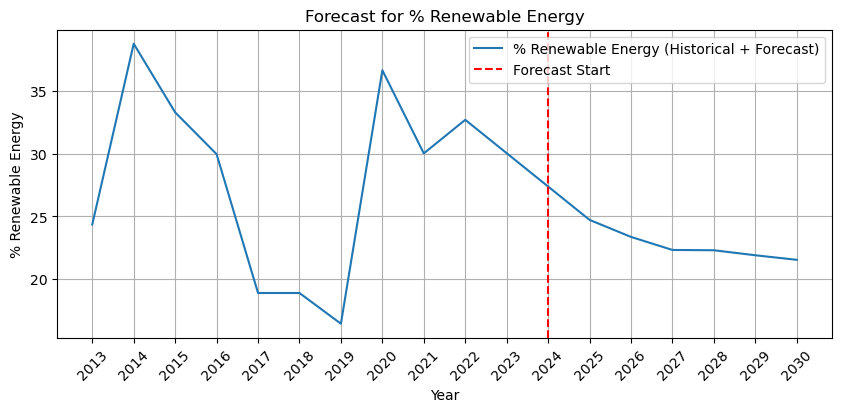

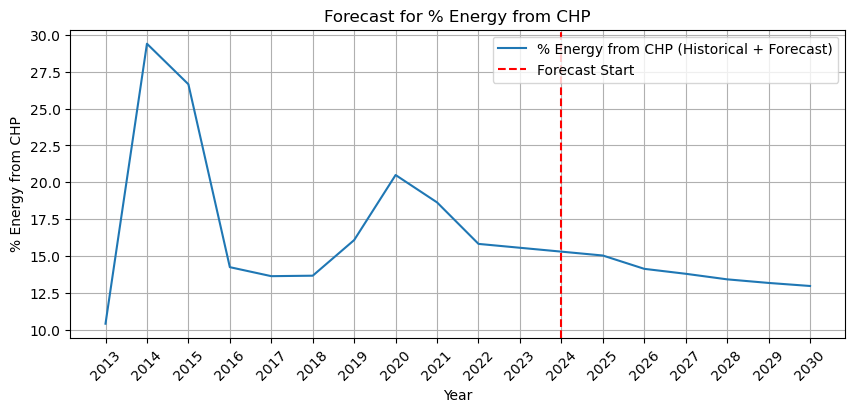

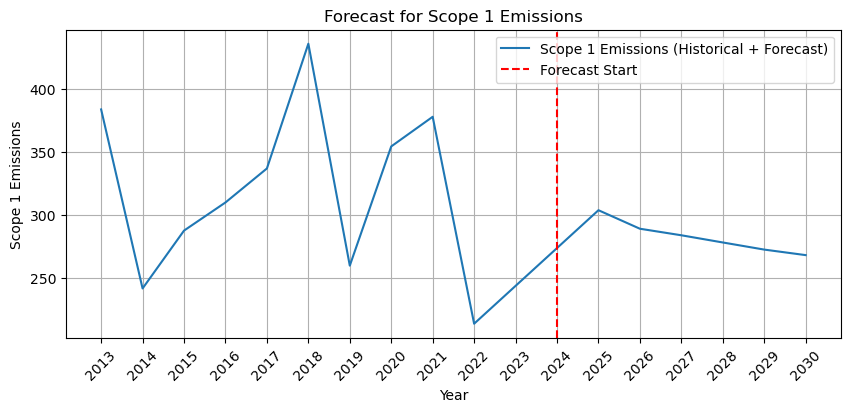

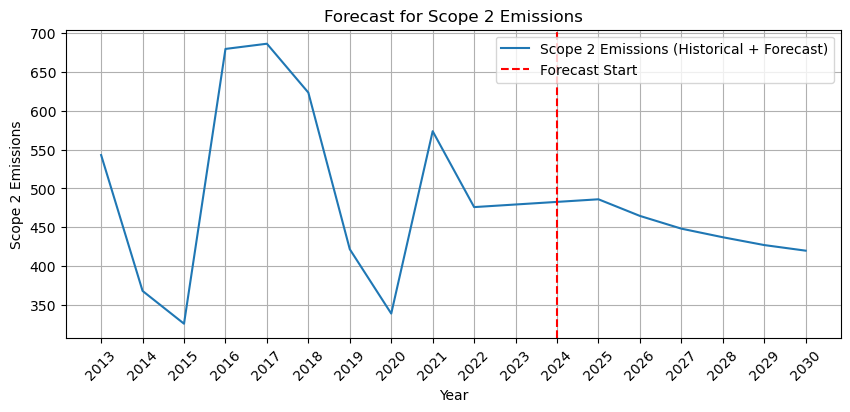

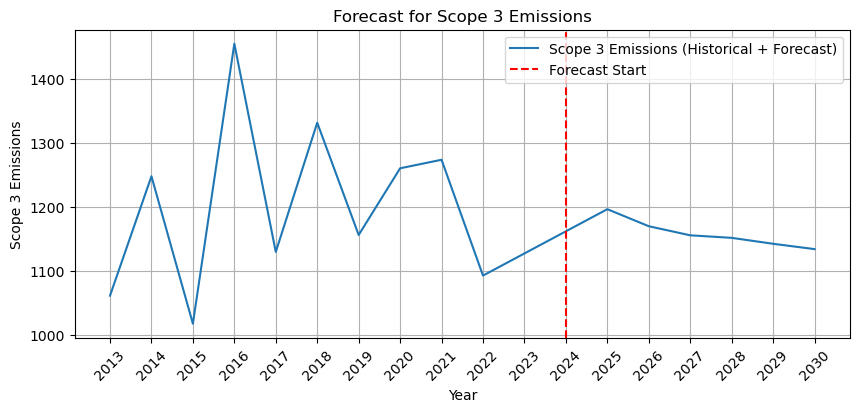

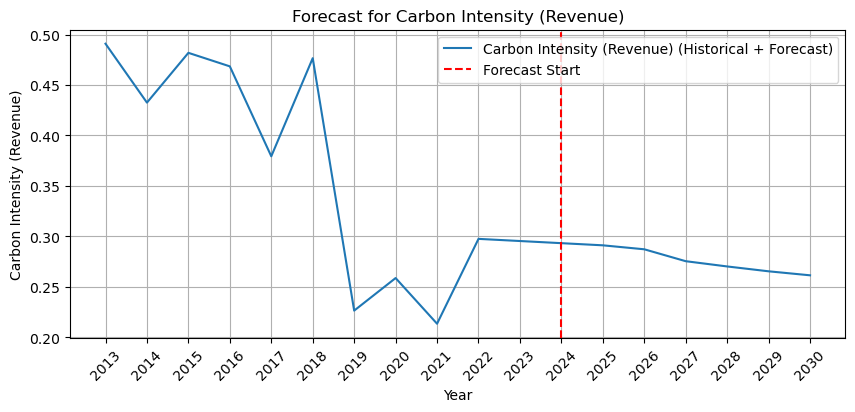

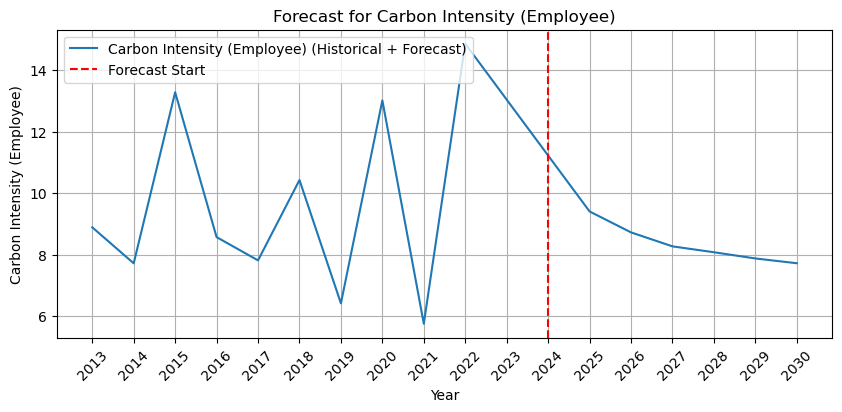

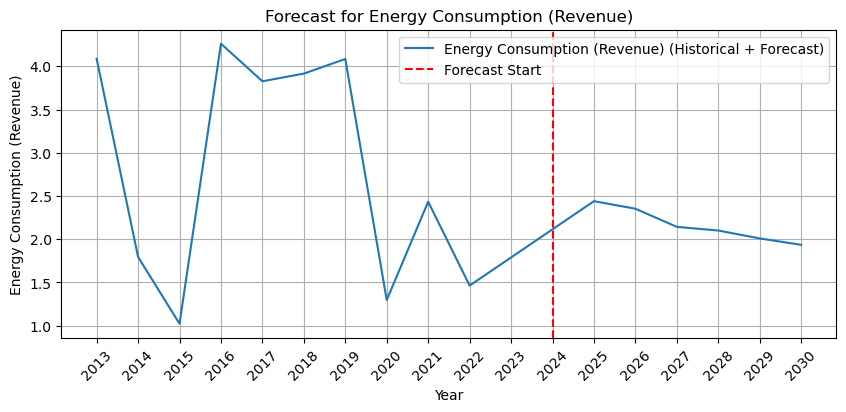

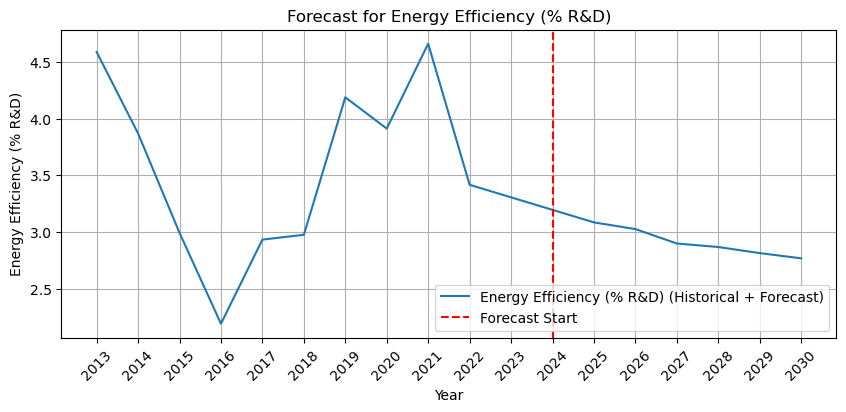

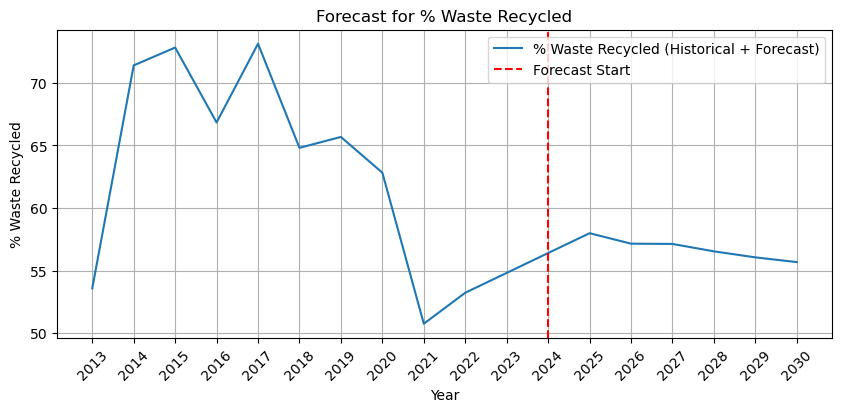

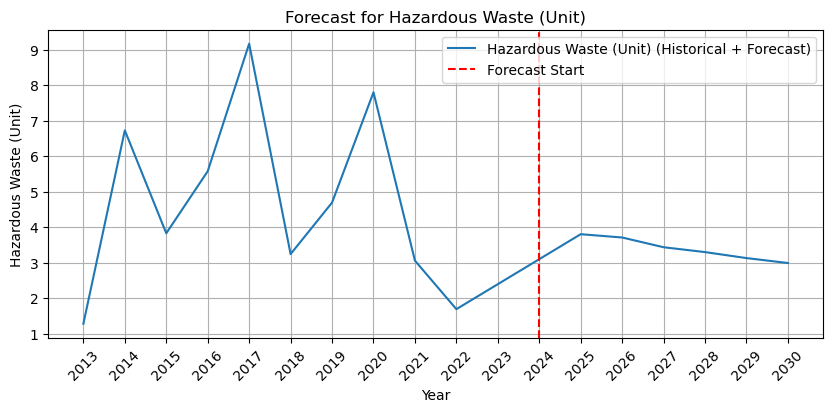

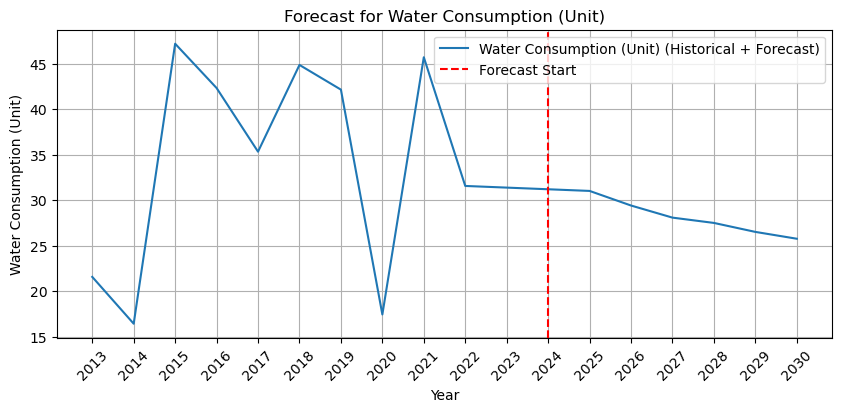

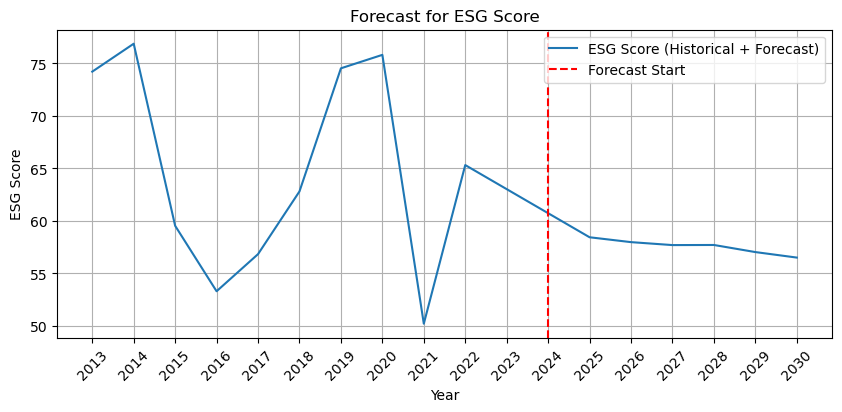

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'synthetic_esg_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Set 'Year' as index and remove it from features
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data.set_index('Year', inplace=True)

# Handle missing values by imputing with mean
data.fillna(data.mean(), inplace=True)

# Normalize the data (excluding the index)
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data.iloc[i:i + seq_length].values)
        y.append(data.iloc[i + seq_length].values)
    return np.array(x), np.array(y)

# Parameters
sequence_length = 3

# Generate sequences
X, y = create_sequences(normalized_data, sequence_length)

# Train the model on the entire dataset
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(y.shape[1])  # Output layer matches the number of features
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=16)

# Forecast future values from 2025 to 2030
future_years = list(range(2025, 2031))
last_sequence = normalized_data.iloc[-sequence_length:].values  # Use the last sequence for prediction
forecast = []

for year in future_years:
    # Predict the next step
    predicted = model.predict(last_sequence[np.newaxis, :, :])[0]
    forecast.append(predicted)
    
    # Update the sequence with the predicted values
    last_sequence = np.vstack([last_sequence[1:], predicted])

# Reverse the normalization for forecasted values
forecast_original = scaler.inverse_transform(np.array(forecast))

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame(forecast_original, columns=data.columns, index=future_years)

# Combine historical data and forecasted values for plotting
combined_data = pd.concat([data, forecast_df])

# Plot the forecasted values
for feature in data.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(combined_data.index, combined_data[feature], label=f'{feature} (Historical + Forecast)')
    plt.axvline(x=2024, color='red', linestyle='--', label='Forecast Start')
    plt.title(f'Forecast for {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.xticks(ticks=np.arange(combined_data.index.min(), combined_data.index.max() + 1, 1), rotation=45)
    plt.legend()
    plt.grid()
    # Save the figure
    plt.savefig(f'{feature}_forecast.png')  # Save as PNG, change extension for other formats
    
    plt.show()
